**Name-Abhishek Balaso Jadhav**


**RollNo-321028**


**PRN-22110490**


**Div-A**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# Load the dataset (assuming it's stored in a CSV file)
df = pd.read_csv('/content/drive/MyDrive/data.csv.zip')

In [ ]:
df.describe

<bound method NDFrame.describe of        pixel_0000  pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
91995           0           0           0           0           0           0   
91996           0           0           0           0           0           0   
91997           0           0           0           0           0           0   
91998           0           0           0           0           0           0   
91999           0           0           0           0           0          

In [ ]:
df.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


In [ ]:


# Extract features and labels
X = df.values[:, :-1]  # Assuming the last column contains image data
Y = df["character"].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Define image dimensions
img_height_rows = 32
img_width_cols = 32

# Convert image data to NumPy array and reshape
x_train_array = np.array(x_train).reshape(-1, img_height_rows, img_width_cols).astype(np.float32)
x_test_array = np.array(x_test).reshape(-1, img_height_rows, img_width_cols).astype(np.float32)

# Normalize pixel values
x_train_array /= 255.0
x_test_array /= 255.0

# Encode training and testing labels in categorical format
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(np.unique(y_train_encoded))
y_train_categorical = to_categorical(y_train_encoded, num_classes=n_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=n_classes)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(img_height_rows, img_width_cols)))
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dense(64, activation='LeakyReLU'))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_array, y_train_categorical, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_array, y_test_categorical)
print('Test accuracy:', test_acc)



Epoch 1/10
1812/1812 [==============================] - 9s 4ms/step - loss: 0.0113 - accuracy: 0.5983 - val_loss: 0.0082 - val_accuracy: 0.7264
Epoch 2/10
1812/1812 [==============================] - 7s 4ms/step - loss: 0.0071 - accuracy: 0.7677 - val_loss: 0.0065 - val_accuracy: 0.7863
Epoch 3/10
1812/1812 [==============================] - 7s 4ms/step - loss: 0.0057 - accuracy: 0.8155 - val_loss: 0.0058 - val_accuracy: 0.8121
Epoch 4/10
1812/1812 [==============================] - 7s 4ms/step - loss: 0.0049 - accuracy: 0.8434 - val_loss: 0.0053 - val_accuracy: 0.8326
Epoch 5/10
1812/1812 [==============================] - 8s 4ms/step - loss: 0.0043 - accuracy: 0.8621 - val_loss: 0.0049 - val_accuracy: 0.8461
Epoch 6/10
1812/1812 [==============================] - 7s 4ms/step - loss: 0.0040 - accuracy: 0.8744 - val_loss: 0.0048 - val_accuracy: 0.8512
Epoch 7/10
1812/1812 [==============================] - 8s 4ms/step - loss: 0.0037 - accuracy: 0.8850 - val_loss: 0.0050 - val_accuracy:

In [ ]:
print(n_classes)

46


863/863 [==============================] - 1s 2ms/step


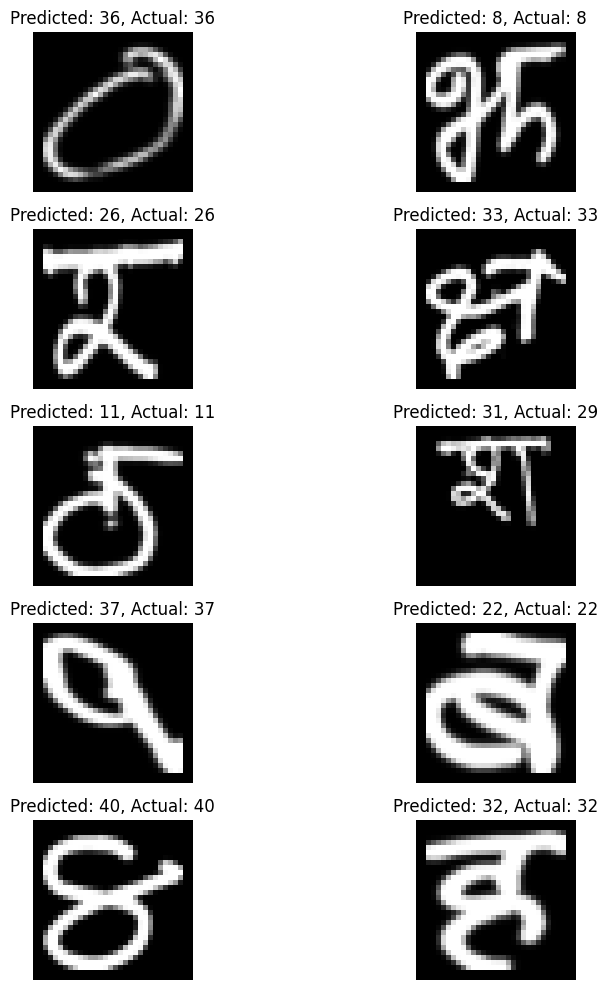

In [ ]:
# Make predictions on test data
predictions = model.predict(x_test_array)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display some sample predictions with images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test_array[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {np.argmax(y_test_categorical[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


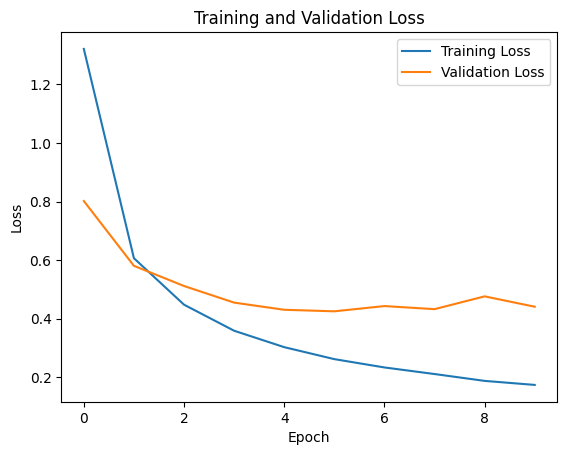

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

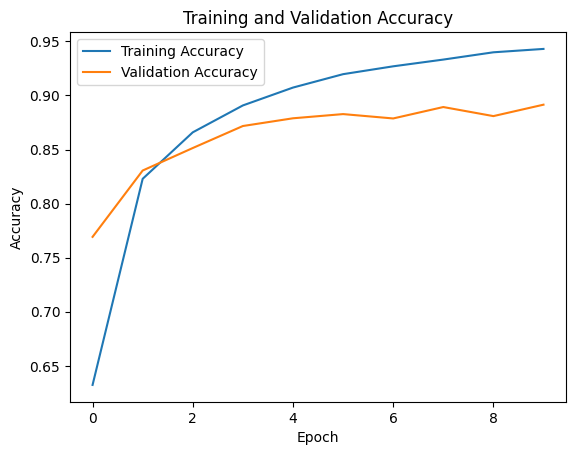

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

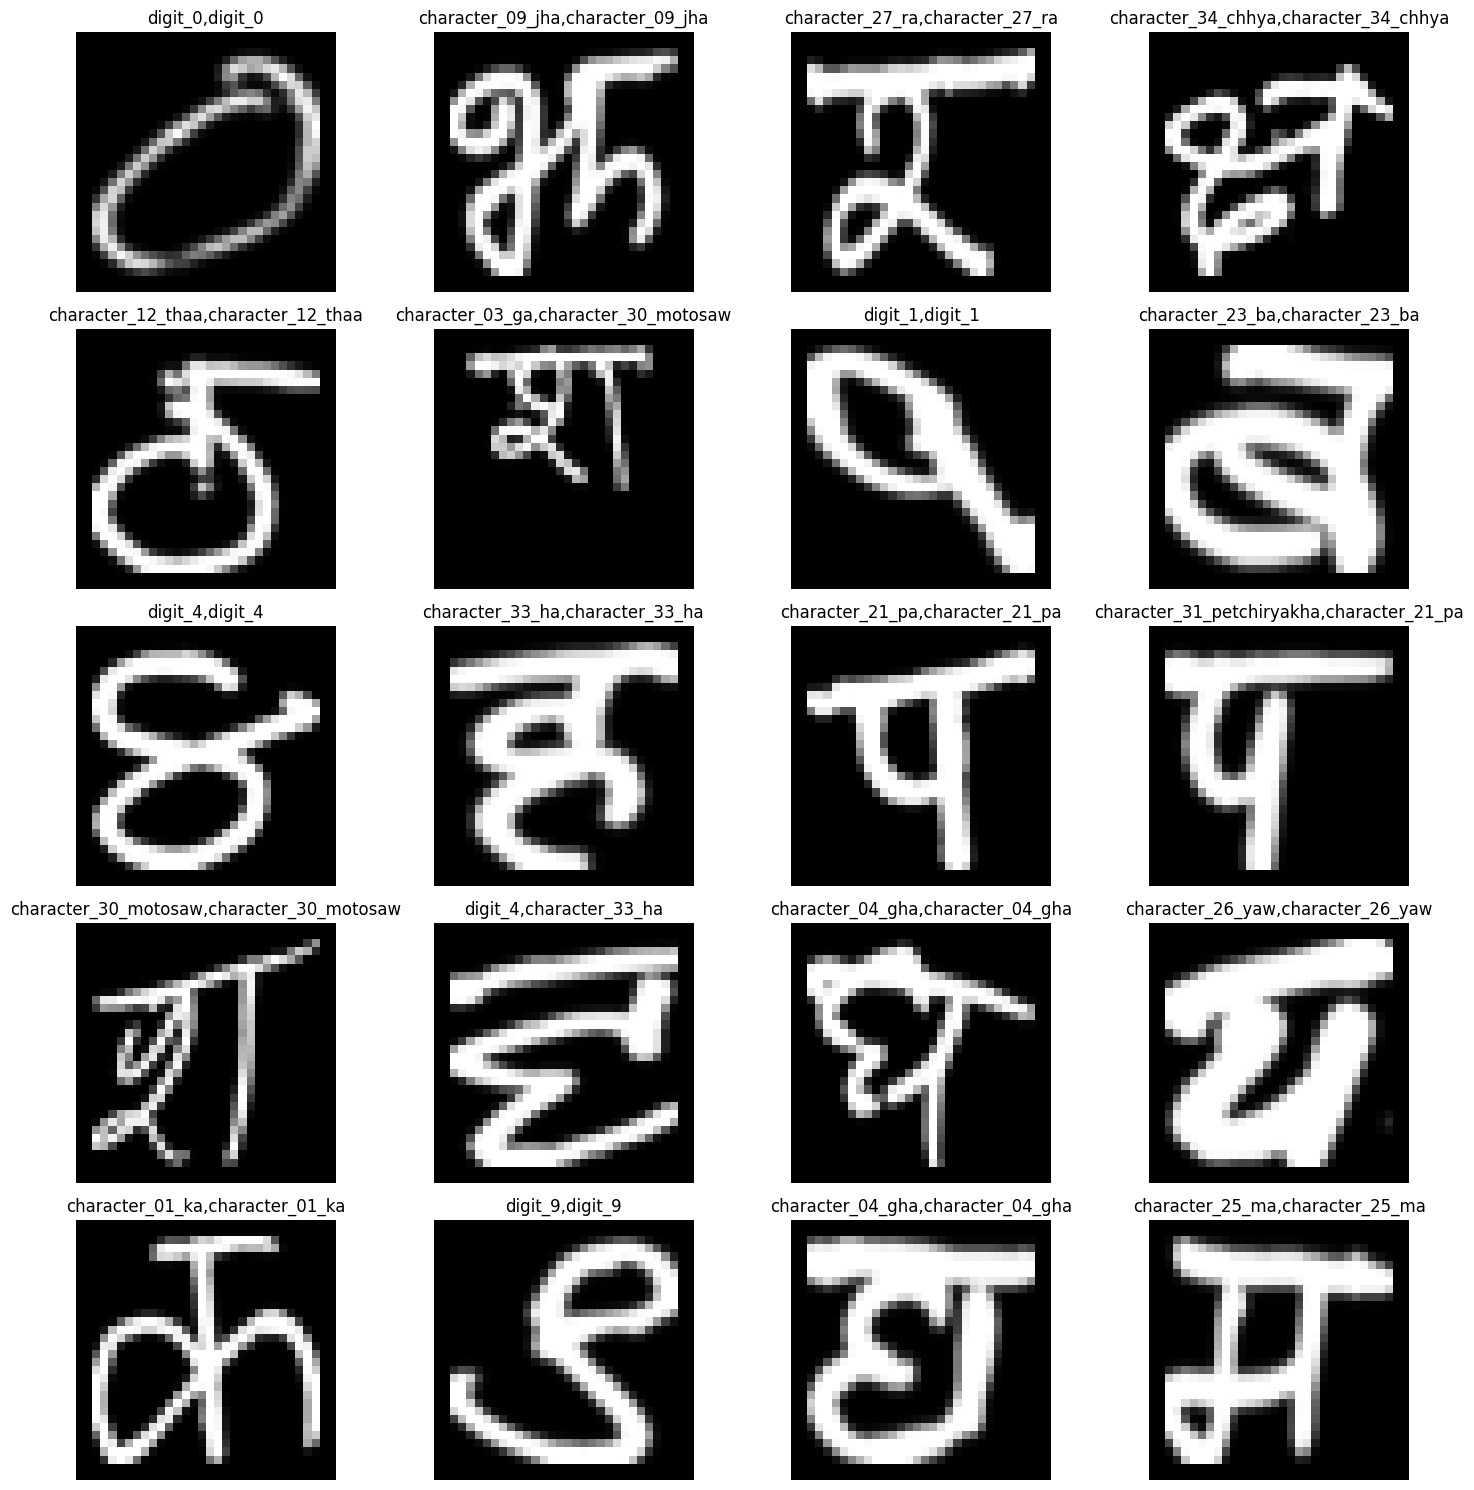

In [ ]:
# Display more sample predictions with images and character names
plt.figure(figsize=(15, 15))
num_samples = 20  # Number of samples to display
for i in range(num_samples):
    plt.subplot(5, 4, i + 1)  # Adjust the subplot grid size as needed
    plt.imshow(x_test_array[i], cmap='gray')
    plt.title(f"{predicted_characters[i]},{actual_characters[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['pixel_0000', 'pixel_0001', 'pixel_0002', 'pixel_0003', 'pixel_0004',
       'pixel_0005', 'pixel_0006', 'pixel_0007', 'pixel_0008', 'pixel_0009',
       ...
       'pixel_1015', 'pixel_1016', 'pixel_1017', 'pixel_1018', 'pixel_1019',
       'pixel_1020', 'pixel_1021', 'pixel_1022', 'pixel_1023', 'character'],
      dtype='object', length=1025)

In [ ]:
len(df)

92000

1/1 [==============================] - 0s 18ms/step


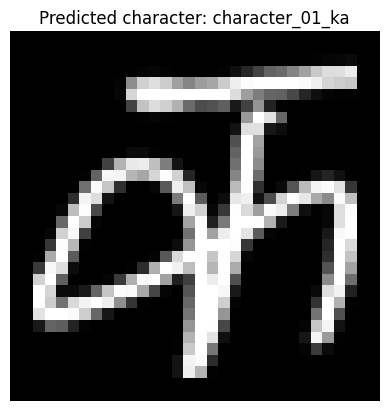

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the user-provided image using cv2
    user_image = cv2.imread(image_path)

    # Convert the image to grayscale
    user_image_gray = cv2.cvtColor(user_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the dimensions expected by your model
    user_image_resized = cv2.resize(user_image_gray, (img_width_cols, img_height_rows))

    # Normalize pixel values
    user_image_normalized = user_image_resized / 255.0

    # Reshape the image array to match the input shape expected by your model
    user_image_array_reshaped = user_image_normalized.reshape(1, img_height_rows, img_width_cols, 1)

    return user_image_array_reshaped

# Prompt the user to enter the path to the image
image_path =r'/content/1345.png'

# Preprocess the user-provided image
user_image_array_reshaped = preprocess_image(image_path)

# Make prediction on the user-provided image
user_prediction = model.predict(user_image_array_reshaped)

# Convert prediction to character name
predicted_character_index = np.argmax(user_prediction)
predicted_character_name = le.inverse_transform([predicted_character_index])[0]

# Display the user-provided image along with the predicted character name
user_image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(user_image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted character: {predicted_character_name}")
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height_rows, img_width_cols, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_reshaped, y_train_categorical, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_categorical)
print('Test accuracy:', test_acc)

# Make predictions on test data
predictions = model.predict(x_test_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# Convert predictions to class labels
predicted_character_names = le.inverse_transform(predicted_classes)

# Display some sample predictions with images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test_array[i], cmap='gray')
    plt.title(f"Predicted: {predicted_character_names[i]}, Actual: {actual_characters[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


NameError: name 'img_height_rows' is not defined

In [ ]:
# Replace 'file_path.pkl' with the desired path and filename for the pickle file
df.to_pickle('/content/drive/My Drive/file_path.pkl')
